In [13]:
import numpy as np

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
import joblib

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
import seaborn as sns

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.model_selection import cross_val_score, KFold

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
import os.path

In [10]:
from joblib import dump

In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [13]:
import tensorflow as tf

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
from sklearn.metrics import classification_report

In [18]:
import keras

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
df=pd.read_csv("diabetes.csv")

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [23]:
def histograms(columns):
    i=0
    for label in (columns):
    
        plt.hist(df[df['Outcome']==1][label], color='red', label='gamma', alpha=0.7, density=True)
        plt.hist(df[df['Outcome']==0][label], color='blue', label='gamma', alpha=0.7, density=True)
        names=['Przebyte ciąże','Poziom glukozy','Ciśnienie krwi','Grubość skóry','Poziom insuliny','BMI','DPF','Wiek']
        plt.title(names[i])
        plt.xlabel(names[i])
        i=i+1
        plt.legend
        plt.show()

In [24]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

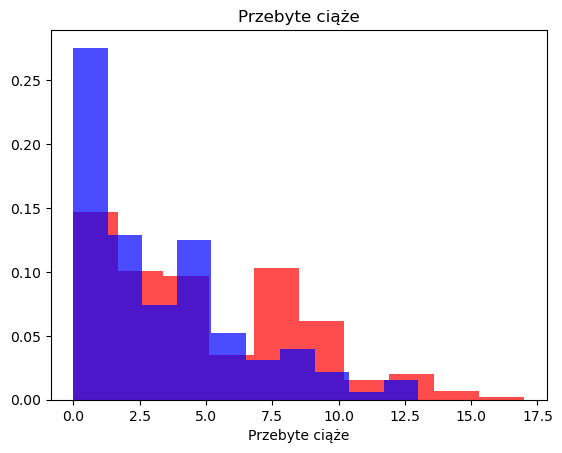

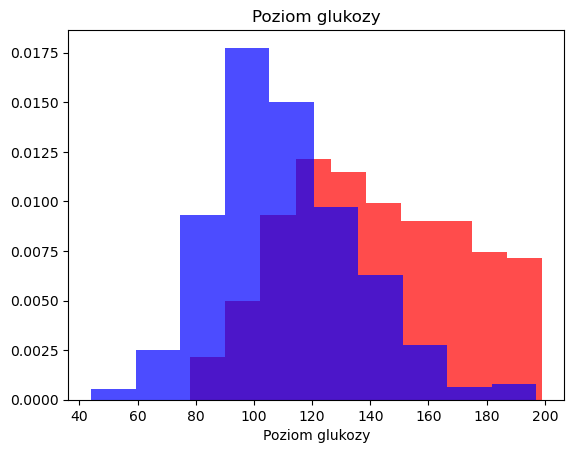

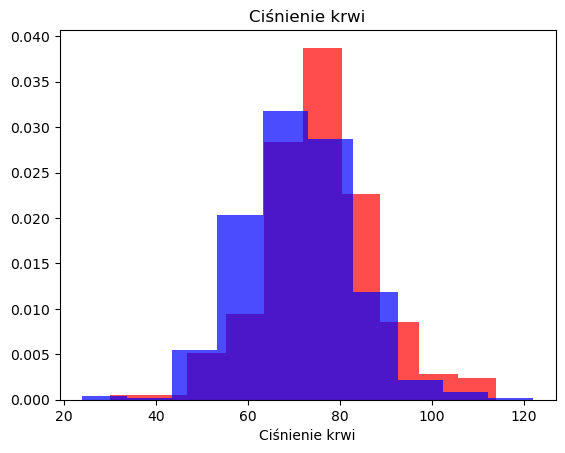

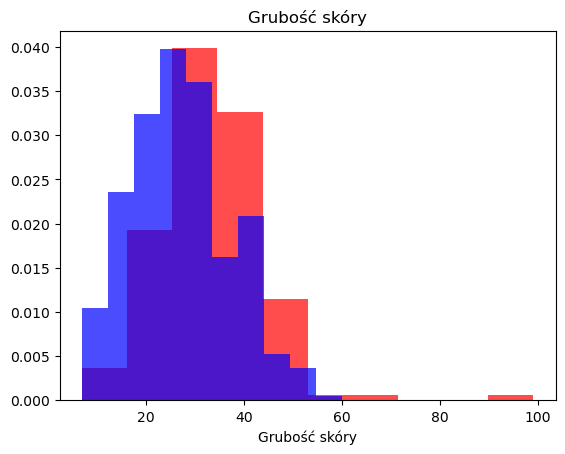

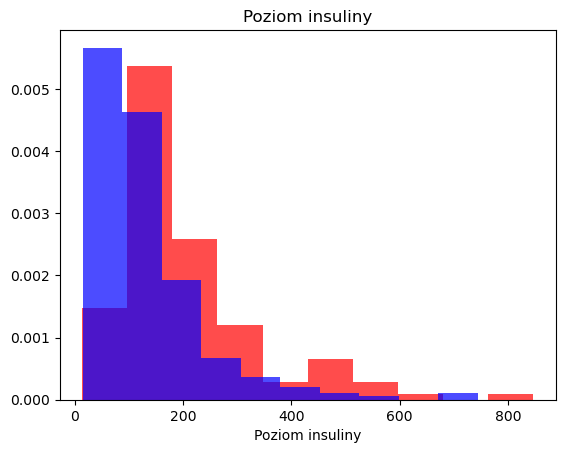

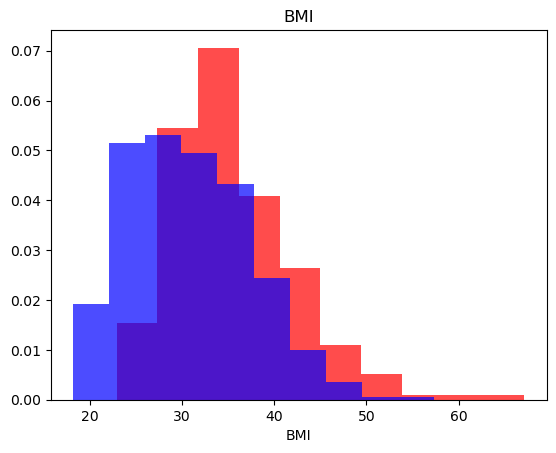

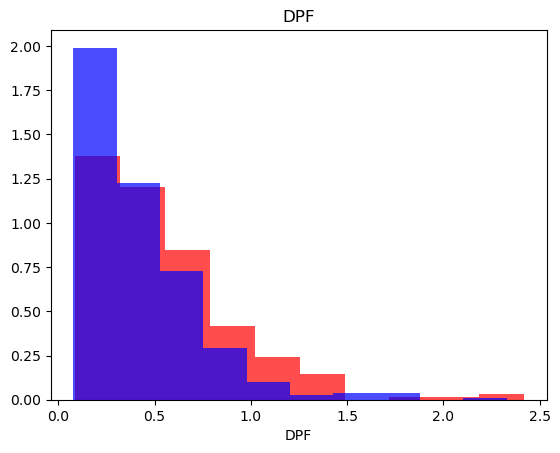

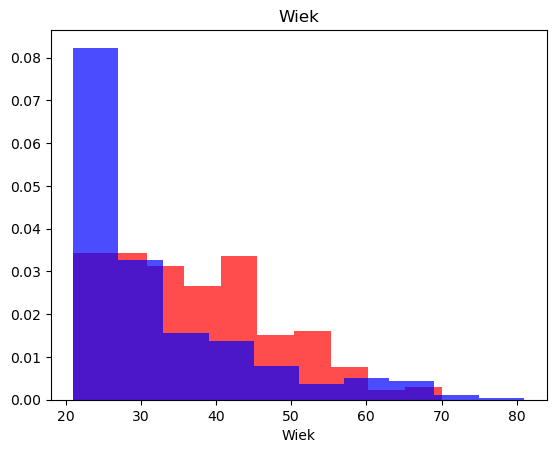

In [25]:
histograms(columns)

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
is_null_sum=[0,5,35,227,374,11,0,0]
final_count=[]
for i in range (8):
    final_count.append(768-is_null_sum[i])
is_null_names=['ciąże','Glukoza','Ciśnienie', 'Grubość fałdy', 'Insulina', 'BMI','DPF','Wiek']
final_count

[768, 763, 733, 541, 394, 757, 768, 768]

In [51]:
def null_graph(sums, names):
    
    plt.bar(names,sums)
    plt.title('Kompletność danych')
    plt.ylim(0, 768)
    plt.xticks(rotation=30) 
   
    
    
    plt.show()
    

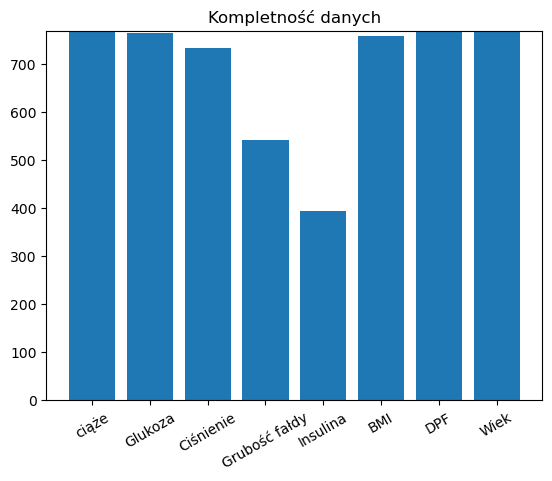

In [53]:
null_graph(final_count, is_null_names)

In [54]:
columns=df.columns
columns=columns.drop('Outcome')

In [55]:
def median(column):
    median=df[df[column].notnull()]
    median=median[[column,'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return median

In [56]:
for x in columns:
    median(x)
    df.loc[(df['Outcome'] == 0 ) & (df[x].isnull()), x] = median(x)[x][0]
    df.loc[(df['Outcome'] == 1 ) & (df[x].isnull()), x] = median(x)[x][1]
    

In [57]:
median_dpf=df['BloodPressure'].median()
median_dpf

72.0

In [58]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


In [6]:
x= df[df.columns[:-1]].values
y=df[df.columns[-1]].values

NameError: name 'df' is not defined

In [23]:
data_size=[60,20,20]
data_names=['grupa ucząca','grupa walidacyjna','grupa testowa']

In [24]:
def datatypes(size,name):
    plt.title('Podział zestawu danych')
    plt.pie(size, labels=name,autopct='%1.1f%%')
    plt.show()

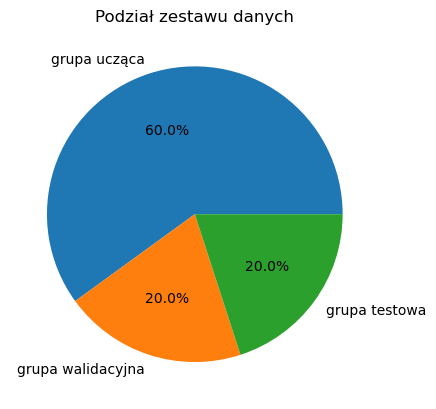

In [25]:
datatypes(data_size,data_names)

In [60]:
outcomes=[268,500]
outcomes_names=['Pozytywne','Negatywne']

In [61]:
allData=768*8
lackingData=5+35+227+374+11
completeData=allData-lackingData
datacomp=[completeData,lackingData]


In [62]:
def missingData(datacomp):
    labels=['','brakujące dane']
    plt.title('Kompletność danych')
    plt.pie(datacomp, labels=labels, colors=['royalblue', 'orangered'], autopct='%1.1f%%')
    

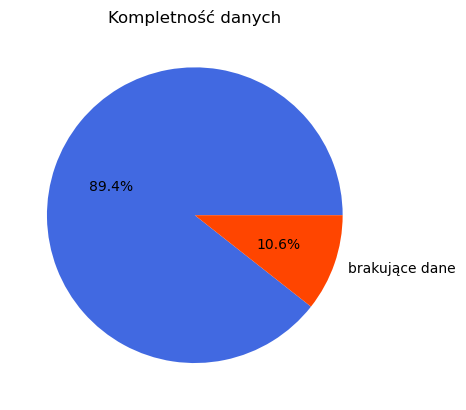

In [63]:
missingData(datacomp)

In [64]:
def outcomes_graph(outcomes,names):
    plt.title('Udział wyników pozytywnych i negatywnych')
    
#     bar_labels=('blue',' red')
#     plt.bar(names, outcomes, label=bar_labels, color=bar_colors)
    plt.pie(outcomes, labels=names, colors=['orangered', 'royalblue'], autopct='%1.1f%%')

    
    plt.show()

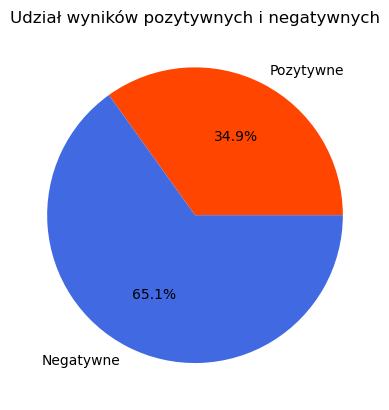

In [94]:
outcomes_graph(outcomes, outcomes_names,)

In [65]:
over= RandomOverSampler(random_state=10)
x,y= over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transform_df= pd.DataFrame(data, columns=df.columns)

In [66]:
x.shape


(1000, 8)

In [67]:
x_train, x_temp, y_train, y_temp= train_test_split(x,y, test_size=0.4,random_state=0)
x_valid, x_test, y_valid, y_test= train_test_split(x_temp, y_temp, test_size=0.5,random_state=0)

In [105]:
# np.save('x_train', x_train)
# np.save('y_train', y_train)

# np.save('x_valid', x_valid)
# np.save('y_valid', y_valid)

# np.save('x_test', x_test)
# np.save('y_test', y_test)

In [25]:
x_train=np.load('x_train.npy')

y_train=np.load('y_train.npy')

x_valid=np.load('x_valid.npy')
y_valid=np.load('y_valid.npy')

x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')

In [77]:
def train_model(x_train, y_train, x_valid, y_valid, num_nodes, dropout_prob, learningRate, batch_size, epochs):
    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learningRate), loss=tf.keras.losses.BinaryCrossentropy(),
                     metrics=['accuracy'])
    history=nn_model.fit(x_train,y_train, batch_size, epochs, validation_data=(x_valid, y_valid))

    return nn_model,history

In [26]:
batch_size= y_train.shape[0]

In [27]:
least_val_loss=[float('inf')]
least_loss_model=None
leastLoss_name=''

In [28]:
neuron_names=[]
neuron_scores=[]

In [ ]:
for num_nodes in [8,16,32,64,128]:
    for dropout_prob in [0, 0.1, 0.2, 0.4]:
        for learning_rate in [0.01, 0.005, 0.001, 0.0005, 0.0001]:
            for epochs in [50, 100, 150, 200]:
                model2, history2=train_model(x_train, y_train, x_valid, y_valid, num_nodes, dropout_prob,learning_rate, batch_size, epochs)
                neuron_names.append('n: '+ str(num_nodes)+ ' dp: '+ str(dropout_prob)+ ' lr: '+ str(learning_rate)+ ' e: '+ str(epochs))
                neuron_scores.append(model2.evaluate(x_valid, y_valid))
                


In [114]:
leastLoss_name

'nodes: 128 dropout: 0 learning rate: 0.01 epochs: 150'

In [117]:
least_loss_model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 830us/step - loss: 0.3861 - accuracy: 0.8350


[0.38607868552207947, 0.8349999785423279]

In [83]:
def plot_history(history):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='Dane treningowe')
    ax1.plot(history.history['val_loss'], label='Dane walidacyjne')
    
    ax1.set_title('Funkcja straty')
    ax1.set_xlabel('Epoki')
    ax1.set_ylabel('Binarna entropia krzyżowa')
    ax1.grid(True)
    ax1.set_ylim([0, 1])
    ax1.legend()
    
    ax2.set_title('Dokładność')
    ax2.plot(history.history['accuracy'], label='Dane treningowe')
    ax2.plot(history.history['val_accuracy'], label='Dane walidacyjne')
    ax2.set_xlabel('Epoki')
    ax2.set_ylabel('dokładność')
    ax2.grid(True)
    ax2.legend()
    plt.show

In [ ]:
model,history=train_model(x_train, y_train, x_valid, y_valid, 128, 0, 0.01, batch_size, 150)


In [ ]:
model2,history2=train_model(x_train, y_train, x_valid, y_valid, 128, 0, 0.01, batch_size,75)

In [ ]:
plot_history(history)

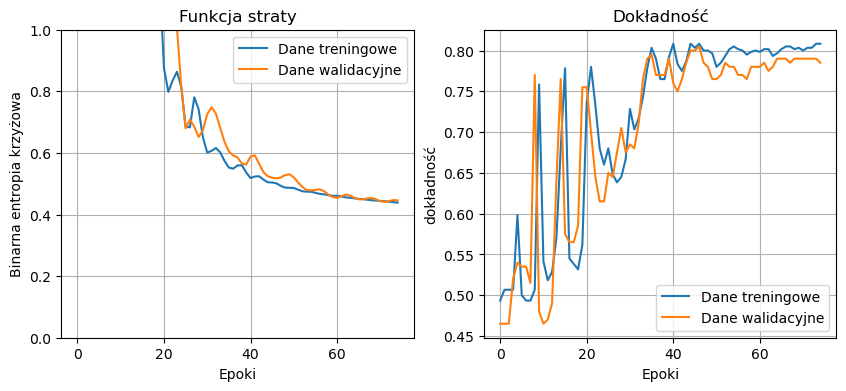

In [177]:
plot_history(history2)

In [172]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 664us/step - loss: 0.3319 - accuracy: 0.8633


[0.3319409489631653, 0.8633333444595337]

In [173]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 830us/step - loss: 0.3598 - accuracy: 0.8650


[0.3598182797431946, 0.8650000095367432]

In [174]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 831us/step - loss: 0.3696 - accuracy: 0.8400


[0.3696111738681793, 0.8399999737739563]

In [119]:
def knn_build(n):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    return knn

In [200]:
def plot_knn(mean, std):
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,4),  gridspec_kw={'wspace': 0.3})
    
    x_values_shifted = np.arange(1, len(mean) + 1)

    ax1.plot(x_values_shifted,mean, color='blue')
    ax1.set_xlabel('Ilość sąsiadów')
    ax1.set_ylabel('Średnia dokładność')
    ax1.grid(True)
    

    ax2.plot(x_values_shifted,std, color='blue')
    ax2.set_xlabel('Ilość sąsiadów')
    ax2.set_ylabel('Średnie odchylenie standardowe')
    ax2.grid(True)
    plt.show
    

In [91]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [202]:
knn_mean=[]
knn_std=[]

In [ ]:
for n in range (1,26):
    knn=knn_build(n)
    scores = cross_val_score(knn, x_train, y_train, cv=kfold, scoring='accuracy')
    knn_mean.append(scores.mean())
    knn_std.append(scores.std())
    print(f'dla n: {n}')
    print(f"Średnia dokładność: {scores.mean()}")
    print(f"Odchylenie standardowe: {scores.std()}")
#     if temp_score> best_score:
#         best_score=temp_score
#         best_n=n

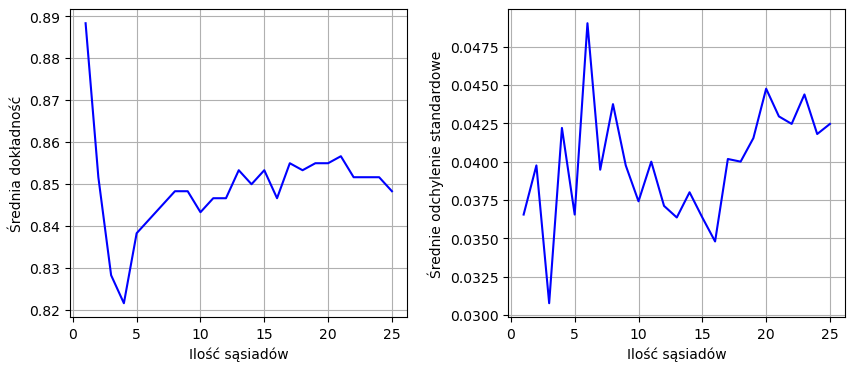

In [205]:
plot_knn(knn_mean,knn_std)

In [206]:
knn_model=knn_build(15)

In [207]:
knn_model.score(x_test,y_test)

0.91

In [208]:
print(f"Średnia dokładność: {scores.mean()}")
print(f"Odchylenie standardowe: {scores.std()}")

Średnia dokładność: 0.8483333333333334
Odchylenie standardowe: 0.04245913067618997


In [282]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [283]:
rf2= RandomForestClassifier()

In [213]:
gs_cv = GridSearchCV(rf2, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [284]:
gs_cv.best_params_

{'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [285]:
rf2 = RandomForestClassifier(**gs_cv.best_params_)

In [286]:
rf2 = rf2.fit(x_train,y_train)

In [287]:
predrf=rf2.predict(x_test)
predrf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [137]:
# dump(knn_model,'knn_model.joblib')
# dump(model,'nn_model.joblib')

In [29]:
knn_model=joblib.load("knn_model.joblib")

In [30]:
model=joblib.load('nn_model.joblib')

In [31]:
rf_model=joblib.load('rf_model2.joblib')

In [32]:
xgb_model=joblib.load('xgb_model.joblib')

In [33]:
y_pred_nn=model.predict(x_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)
print(classification_report(y_test,y_pred_nn))

7/7 [==============================] - 0s 831us/step
              precision    recall  f1-score   support

           0       0.93      0.79      0.86        97
           1       0.83      0.94      0.88       103

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [34]:
y_pred_knn= knn_model.predict(x_test)


print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        97
           1       0.88      0.95      0.92       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [52]:
y_pred_rf=rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92        97
           1       0.90      0.97      0.93       103

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [37]:
raport_knn = classification_report(y_test, y_pred_knn)

In [38]:
nn_acu= model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8700


In [56]:
report_names=('precision','recall', 'f1')
report_names2=('precision','recall','accuracy')
report_stats0={
    'sieć neuronowa':(0.93,0.79,0.86),
    'K-n. sąsiadów': (0.94, 0.87, 0.90),
    'las losowy':(0.97, 0.87, 0.90),
    'XGBoost':(0.94,0.90, 0.92)
}

report_stats1={
        'sieć neuronowa':(0.83,0.94,0.88),
    'K-n. sąsiadów': (0.88,0.95,0.92),
    'las losowy':(0.90, 0.97,0.93),
    'XGBoost':(0.91,0.94,0.92)
}

report_stats_avg={
    'sieć neuronowa':(0.88,0.87,0.87),
    'K-n. sąsiadów': (0.91,0.91,0.91),
    'las losowy':(0.93,0.93,0.93),
    'XGBoost':(0.92,0.92,0.92)
}

In [77]:
tab_names=['model','precision','recall', 'f1']
tab_names2=['model','precision','recall', 'accuracy']

tab0=[['sieć neuronowa',0.93,0.79,0.86],
    ['K-n. sąsiadów', 0.94, 0.87, 0.90],
    ['las losowy',0.97, 0.87, 0.90],
    ['XGBoost',0.94,0.90, 0.92]]

tab1=[['sieć neuronowa',0.83,0.94,0.88],
    ['K-n. sąsiadów',0.88,0.95,0.92],
    ['las losowy',0.90, 0.97,0.93],
    ['XGBoost',0.91,0.94,0.92]]

tabavg=[['sieć neuronowa',0.88,0.87,0.87],
    ['K-n. sąsiadów',0.91,0.91,0.91],
    ['las losowy',0.93,0.93,0.93],
    ['XGBoost',0.92,0.92,0.92]]


In [75]:
def table(names, stats):
    data=stats


    fig, ax = plt.subplots()
    table = ax.table(cellText=data, colLabels=names,
                 cellLoc='center', loc='center')


    ax.axis('off')


    plt.show()

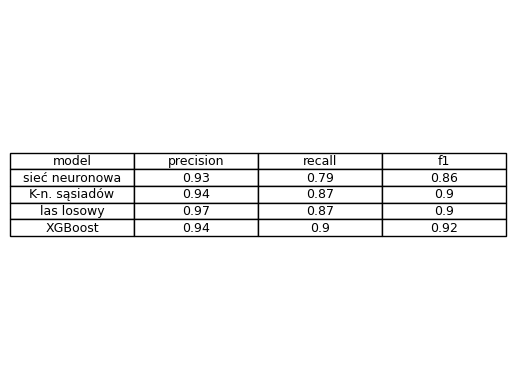

In [76]:
table(tab_names,tab0)

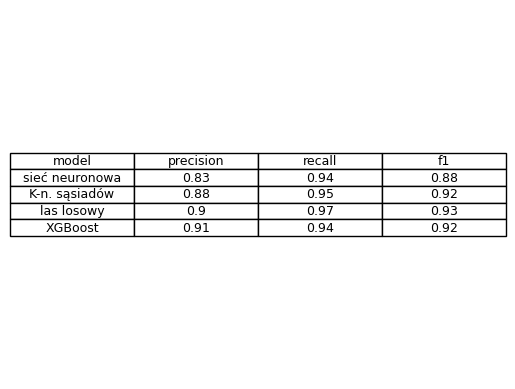

In [78]:
table(tab_names,tab1)

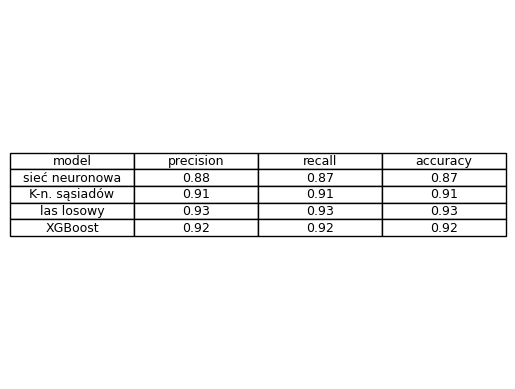

In [79]:
table(tab_names2,tabavg)

In [58]:
def plot_stats(name, names, stats):
    
    x = np.arange(len(names))  
    width = 0.2 
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in stats.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
        
        ax.set_title(name)
        ax.set_xticks(x + width, names)
        ax.legend( loc='upper center', bbox_to_anchor=(0.5,-0.1), ncol=4)
        ax.set_ylim(0.7, 1)
     
        
        
        plt.show
    

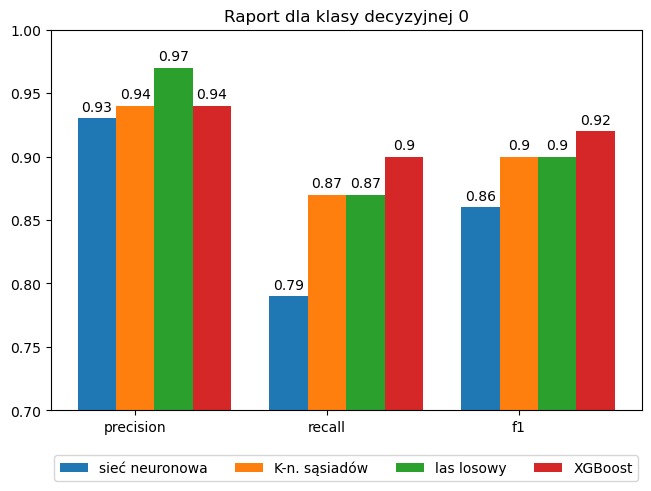

In [107]:
plot_stats('Raport dla klasy decyzyjnej 0', report_names, report_stats0)

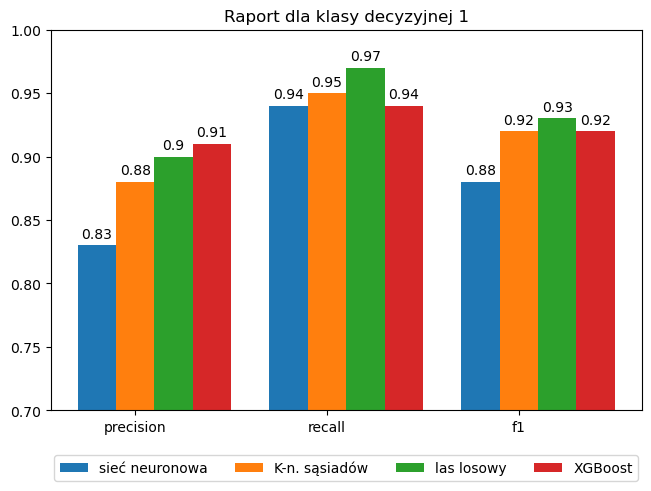

In [108]:
plot_stats('Raport dla klasy decyzyjnej 1', report_names, report_stats1)

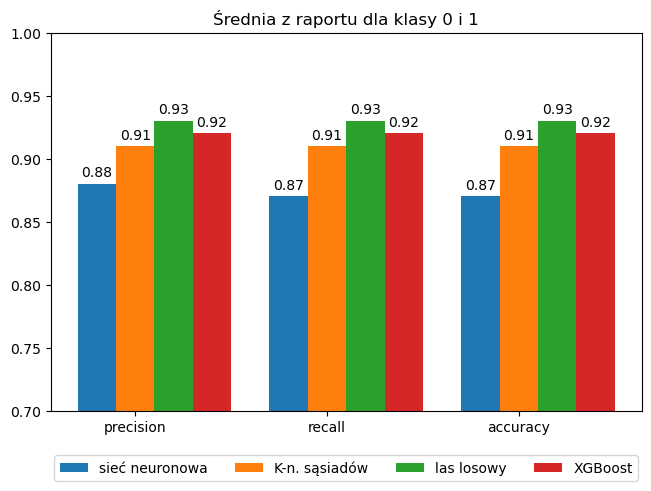

In [61]:
plot_stats('Średnia z raportu dla klasy 0 i 1', report_names2, report_stats_avg)

In [71]:
xgb = GradientBoostingClassifier(random_state = 43)

In [72]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [73]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [83]:
xgb_cv_model.best_params_

{'learning_rate': 1,
 'max_depth': 8,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

In [84]:
xgb_model=GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(x_train, y_train)

In [43]:
y_pred_xgb=xgb_model.predict(x_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        97
           1       0.91      0.94      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [83]:
def severity_level(model,columns, model_name):
    importance=model.feature_importances_
    names=columns
    
    sorted_idx =importance.argsort()
    
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [names[i] for i in sorted_idx])
    plt.xlabel('Ważność cechy')
    plt.title('Poziom ważności cech, w modelu '+model_name)
    plt.xlim(0,1)
    plt.show()
    
    

In [75]:
columns_pol=['Ciąże','Glukoza','Ciśnienie','Grubość fałdy','Insulina','BMI','DPF','Wiek']

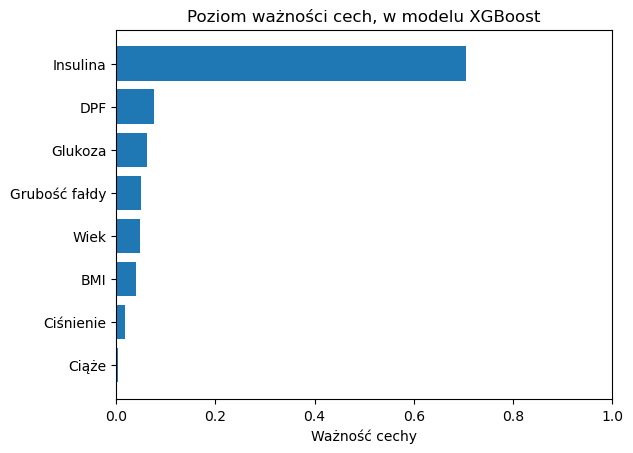

In [87]:
severity_level(xgb_model, columns_pol,'XGBoost')

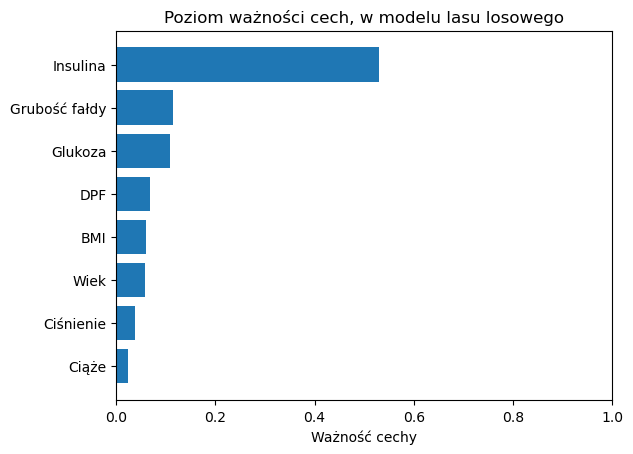

In [84]:
severity_level(rf_model, columns_pol,'lasu losowego')